In [31]:
import os
import numpy as np
import pandas as pd

In [13]:
%pwd

'/home/jarvis/jarvis/upgrad/masters/EDA'

In [14]:
%cd '/home/jarvis/jarvis/upgrad/masters/EDA'

/home/jarvis/jarvis/upgrad/masters/EDA


In [15]:
os.listdir()

['.ipynb_checkpoints',
 'EDA_Data_Sourcing.xlsx',
 'my_EDA.ipynb',
 'DDW-0000C-08.xlsx']

In [16]:
census = pd.read_csv('DDW-0000C-08.xlsx')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 3


In [17]:
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')

In [19]:
marks.shape

(99, 6)

In [29]:
marks = marks[marks.isnull().sum(axis=1) < 5]

In [30]:
marks.isnull().sum()

Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64

In [32]:
marks.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [34]:
rating = pd.read_csv('https://query.data.world/s/EX0EpmqwfA2UYGz1Xtd_zi4R0dQpog')

In [35]:
rating.shape

(1254, 5)

In [40]:
rating[rating.duplicated()]

,userID,placeID,rating,food_rating,service_rating
15,U1077,132825,2,2,2
16,U1077,135060,1,2,2
17,U1068,135104,1,1,2
18,U1068,132740,0,0,0
19,U1068,132663,1,1,1
...,...,...,...,...,...
217,U1072,135016,1,2,2
218,U1072,132773,2,1,2
219,U1072,135088,0,1,0
220,U1026,132561,1,1,1


In [41]:
rating[rating.placeID==132825]

,userID,placeID,rating,food_rating,service_rating
2,U1077,132825,2,2,2
15,U1077,132825,2,2,2
275,U1055,132825,2,2,2
278,U1053,132825,1,2,0
301,U1081,132825,1,0,1
309,U1001,132825,2,2,1
341,U1056,132825,2,2,2
346,U1134,132825,1,2,1
445,U1116,132825,2,2,2
482,U1024,132825,1,1,0


In [43]:
rating[rating.userID=='U1055']

,userID,placeID,rating,food_rating,service_rating
260,U1055,135051,1,2,2
261,U1055,135075,2,2,2
262,U1055,132572,2,2,2
263,U1055,135028,2,2,2
264,U1055,135025,2,2,2
267,U1055,135106,2,2,2
272,U1055,135048,2,2,2
273,U1055,135047,2,2,2
274,U1055,132754,2,2,2
275,U1055,132825,2,2,2


In [44]:
import pandas as pd
rating = pd.read_csv('https://query.data.world/s/EX0EpmqwfA2UYGz1Xtd_zi4R0dQpog')

rating_update = rating.drop_duplicates()

print(rating.shape)
print(rating_update.shape)

(1254, 5)
(1149, 5)


In [61]:
df = pd.read_csv('tendulkar_ODI.csv')

In [62]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [63]:
df = df[~df.Runs.isin(['DNB', 'TDNB'])]

In [70]:
df.Runs = df.Runs.apply(lambda x: x[:-1] if x[-1]=='*' else x).astype('int32')

In [71]:
import matplotlib.pyplot as plt
df.Runs.value_counts()

1     16
2     14
0     12
4      9
21     8
      ..
87     1
89     1
90     1
91     1
60     1
Name: Runs, Length: 105, dtype: int64

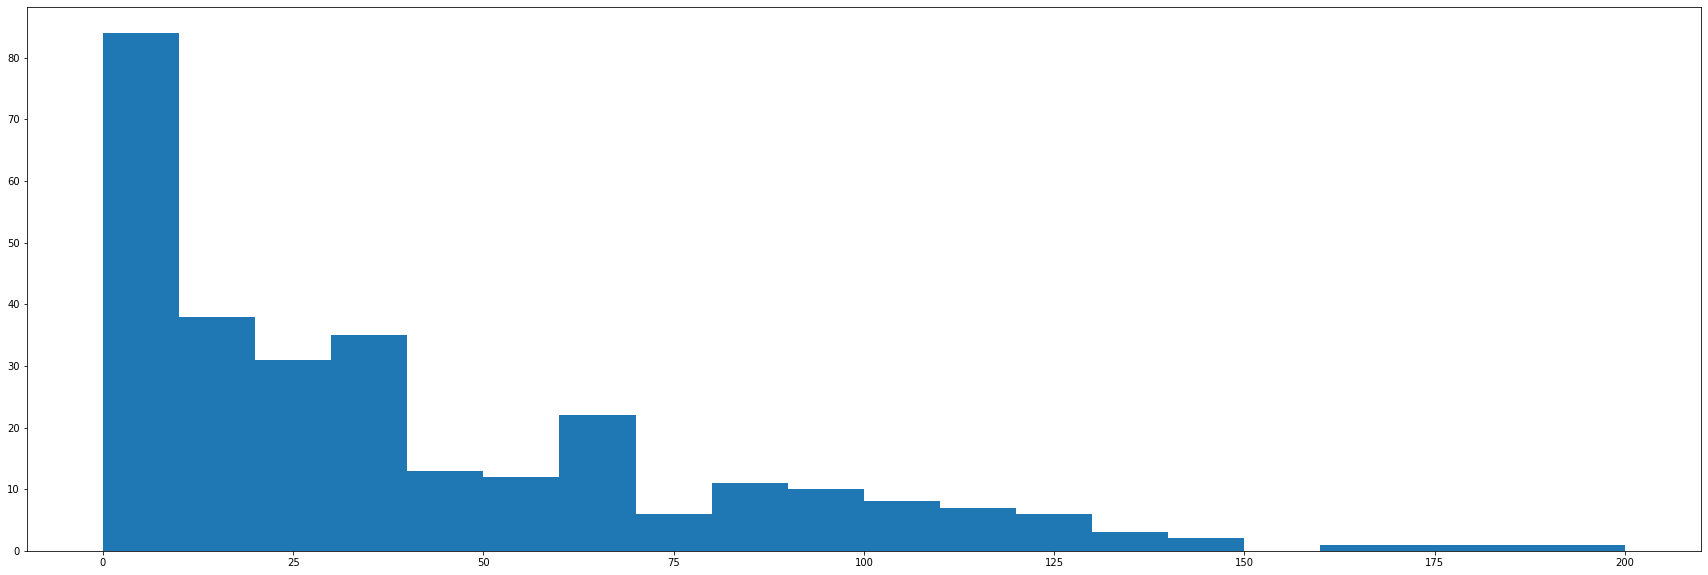

In [86]:
plt.figure(figsize=(30,10))
plt.hist(df.Runs, bins=range(min(df.Runs), max(df.Runs)+10, 10))
plt.show()

In [90]:
df['4s'].value_counts()

0     69
1     37
2     29
3     25
4     17
5     16
9     15
6     14
8     13
7     13
10    11
13     8
12     5
11     4
15     4
16     4
14     3
19     2
20     1
25     1
17     1
Name: 4s, dtype: int64

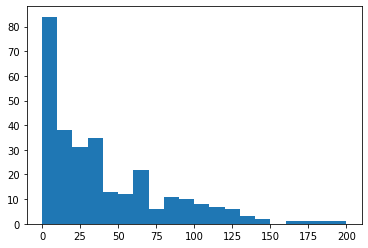

In [91]:
df

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
291,292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
292,293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12
293,294,14,34,15,2,0,93.33,2,run out,2,v Australia,Sydney,26-Feb-12


In [92]:
os.listdir()

['.ipynb_checkpoints',
 'EDA_Data_Sourcing.xlsx',
 'Data+Cleaning+_+Checklist.xlsx',
 'employment-data (copy).csv',
 'my_EDA.ipynb',
 'popularity.csv',
 'employment-data.csv',
 'tendulkar_ODI.csv',
 'DDW-0000C-08.xlsx']

In [242]:
df4 = pd.read_csv('popularity.csv')
df4.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [95]:
import seaborn as sns

In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [110]:
df4[' num_keywords'].value_counts()

7.0     7322
6.0     6801
10.0    6708
8.0     6094
5.0     4829
9.0     4732
4.0     2427
3.0      635
1.0       51
2.0       45
Name:  num_keywords, dtype: int64

In [182]:
df4[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [121]:
np.quantile(df4[' shares'], 0.70)

2300.0

In [122]:
np.quantile(df4[' shares'], 0.80)

3400.0

In [129]:
df4_mean = df4[' shares'].describe()[1]

In [130]:
df4_std = df4[' shares'].describe()[2]

In [133]:
df4_ = df4[(df4[' shares'] > (df4_mean - (2*df4_std))) & (df4[' shares'] < (df4_mean + (2*df4_std)))]

In [135]:
df4_[' shares'].describe()

count    39130.000000
mean      2604.414925
std       3356.840372
min          1.000000
25%        941.000000
50%       1400.000000
75%       2700.000000
max      26600.000000
Name:  shares, dtype: float64

In [151]:
low=0.05
high=0.95
quant = df4.quantile([low, high])

In [196]:
quant[' shares']

0.05      584.0
0.95    10800.0
Name:  shares, dtype: float64

In [169]:
df4_1 = df4.loc[:, df4.columns != 'url']
df4_1 = df4_1.loc[:, df4_1.columns != ' timedelta']

In [170]:
df4_1

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [176]:
df4_2 = df4_1[~df4_1[' shares'].isnull()]

In [177]:
df4_2 = df4_2.apply(lambda x: x[(x>quant.loc[low, x.name]) & (x < quant.loc[high, x.name])], axis=0)

In [178]:
df4_2[' shares'].describe()

count    35660.000000
mean      2160.171032
std       1872.004126
min        585.000000
25%        985.000000
50%       1400.000000
75%       2500.000000
max      10700.000000
Name:  shares, dtype: float64

In [228]:
cols = [' shares'] # one or more

Q1 = df4[cols].quantile(0.01)
Q3 = df4[cols].quantile(0.99)
IQR = Q3 - Q1

df4_3 = df4[((df4[cols] > (Q1)) & (df4[cols] < (Q3)))]

In [229]:
df4_3[' shares'].describe()

count    38849.000000
mean      2708.085356
std       3657.048144
min        382.000000
25%        954.000000
50%       1400.000000
75%       2700.000000
max      31600.000000
Name:  shares, dtype: float64

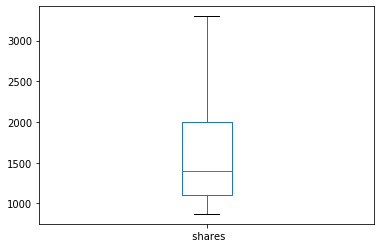

In [225]:
df4_3[' shares'].plot.box()

In [232]:
df4[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [241]:
df4[df4[' shares'] <= 10800][' shares'].describe()[0]/df4[' shares'].describe()[0]

0.950030269397639

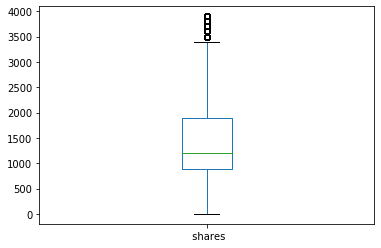

In [249]:
df4[df4[' shares'] < 4000][' shares'].plot.box()

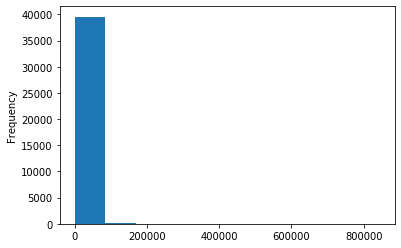

In [252]:
df4[' shares'].plot.hist()

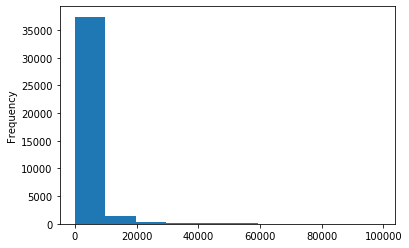

In [254]:
df4[df4[' shares'] < 100000][' shares'].plot.hist()

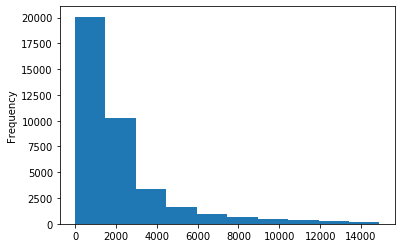

In [255]:
df4[df4[' shares'] < 15000][' shares'].plot.hist()